In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Cargar los datos
#file_path = '/content/data_jugadores.csv'
#data = pd.read_csv(file_path, delimiter=',')

rutaArchivo = "D:\WS_ANALITICA_DATOS\sports_prediction\data\data_jugadores.csv"
data = pd.read_csv(rutaArchivo)
data.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,34,2862,23,25.939281,7,6.353777,135,36,2,1,F S,Barcelona,23,25.196005,36.746244,9.871429
1,2370,Karim Benzema,24,2056,19,23.952812,3,6.247547,107,48,1,0,F,Real Madrid,12,18.006583,25.885614,8.579490
2,866,Joselu,34,2989,16,15.871624,2,2.095152,93,22,2,0,F S,Espanyol,11,12.155238,13.920118,2.132708
3,2270,Antoine Griezmann,38,2853,15,11.751190,16,15.643586,111,85,2,0,F M S,Atletico Madrid,15,11.751190,30.893706,11.252617
4,2543,Borja Iglesias,35,2406,15,15.634133,3,2.921825,63,22,2,1,F S,Real Betis,10,11.174591,15.961691,3.046393


In [20]:
# Preprocesamiento
data = pd.get_dummies(data, columns=['position', 'team_title'])
features = data.drop(['id', 'player_name'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [21]:
# Función para evaluar K-means con diferentes números de clusters
def evaluate_kmeans(features_scaled, max_clusters=10):
    silhouette_scores = []
    davies_bouldin_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(features_scaled)
        silhouette = silhouette_score(features_scaled, labels)
        davies_bouldin = davies_bouldin_score(features_scaled, labels)
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
    return silhouette_scores, davies_bouldin_scores

In [22]:
# Función para evaluar DBSCAN con diferentes parámetros
def evaluate_dbscan(features_scaled, eps_values, min_samples_values):
    best_silhouette = -1
    best_davies_bouldin = np.inf
    best_eps = None
    best_min_samples = None
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(features_scaled)
            if len(set(labels)) > 1:
                silhouette = silhouette_score(features_scaled, labels)
                davies_bouldin = davies_bouldin_score(features_scaled, labels)
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_davies_bouldin = davies_bouldin
                    best_eps = eps
                    best_min_samples = min_samples
    return best_silhouette, best_davies_bouldin, best_eps, best_min_samples


In [23]:
# Evaluar K-means con diferentes números de clusters
silhouette_scores_kmeans, davies_bouldin_scores_kmeans = evaluate_kmeans(features_scaled)


c:\ProgramData\anaconda3\envs\ProjectEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ProjectEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ProjectEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ProjectEnv\lib\site-packages\sklearn\cluster\_kmeans.py:13

In [24]:
# Evaluar DBSCAN con diferentes parámetros
eps_values = np.arange(0.3, 0.8, 0.1)
min_samples_values = range(3, 10)
best_silhouette_dbscan, best_davies_bouldin_dbscan, best_eps, best_min_samples = evaluate_dbscan(features_scaled, eps_values, min_samples_values)


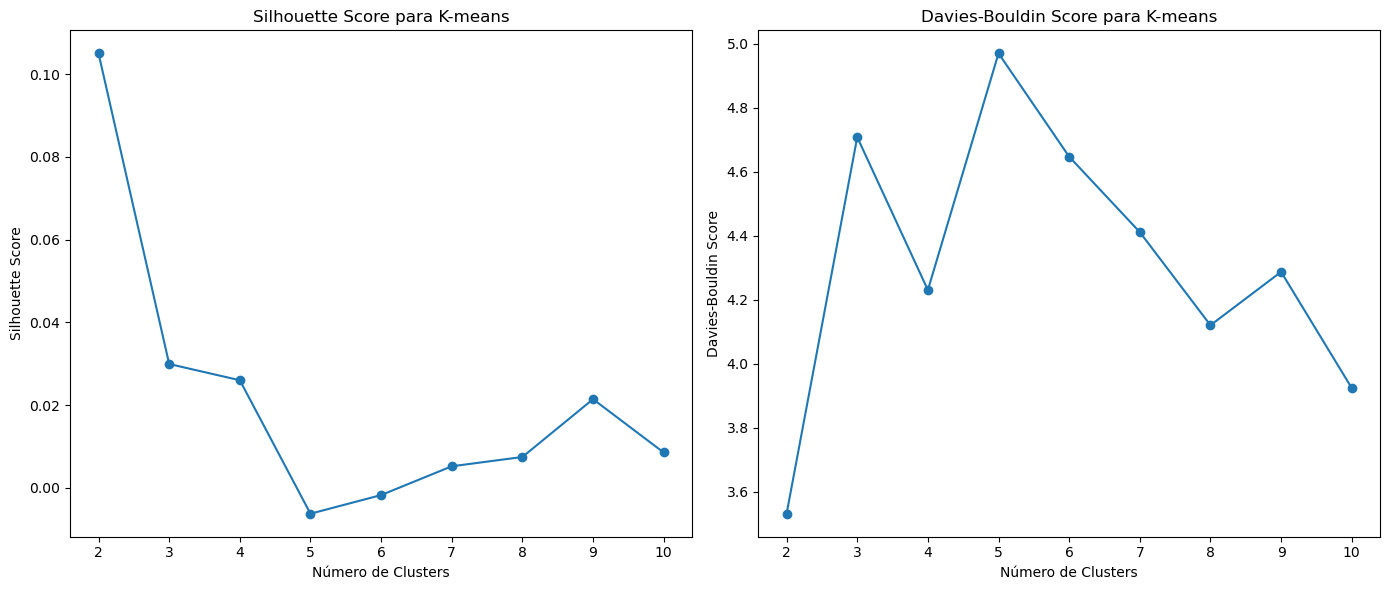

Mejor Silhouette Score para DBSCAN: -0.07668348440583626 con eps=0.3 y min_samples=7
Mejor Davies-Bouldin Score para DBSCAN: 1.1564302722613442 con eps=0.3 y min_samples=7


In [25]:
# Visualización de los resultados para K-means
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, len(silhouette_scores_kmeans) + 2), silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Score para K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(range(2, len(davies_bouldin_scores_kmeans) + 2), davies_bouldin_scores_kmeans, marker='o')
plt.title('Davies-Bouldin Score para K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

print(f"Mejor Silhouette Score para DBSCAN: {best_silhouette_dbscan} con eps={best_eps} y min_samples={best_min_samples}")
print(f"Mejor Davies-Bouldin Score para DBSCAN: {best_davies_bouldin_dbscan} con eps={best_eps} y min_samples={best_min_samples}")


In [26]:
# Aplicar el mejor modelo K-means
best_k = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

c:\ProgramData\anaconda3\envs\ProjectEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [27]:
# Aplicar el mejor modelo DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(features_scaled)

In [28]:
# Evaluación final
final_silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)
final_davies_bouldin_kmeans = davies_bouldin_score(features_scaled, kmeans_labels)

final_silhouette_dbscan = silhouette_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
final_davies_bouldin_dbscan = davies_bouldin_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f"Final K-means Silhouette Score: {final_silhouette_kmeans}")
print(f"Final K-means Davies-Bouldin Score: {final_davies_bouldin_kmeans}")
print(f"Final DBSCAN Silhouette Score: {final_silhouette_dbscan}")
print(f"Final DBSCAN Davies-Bouldin Score: {final_davies_bouldin_dbscan}")


Final K-means Silhouette Score: 0.1050696394975113
Final K-means Davies-Bouldin Score: 3.5320317263663354
Final DBSCAN Silhouette Score: -0.07668348440583626
Final DBSCAN Davies-Bouldin Score: 1.1564302722613442


C:\Users\vid_2\AppData\Local\Temp\ipykernel_2468\1098142445.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=silhouette_scores_final, palette='Blues')
C:\Users\vid_2\AppData\Local\Temp\ipykernel_2468\1098142445.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=davies_bouldin_scores_final, palette='Greens')


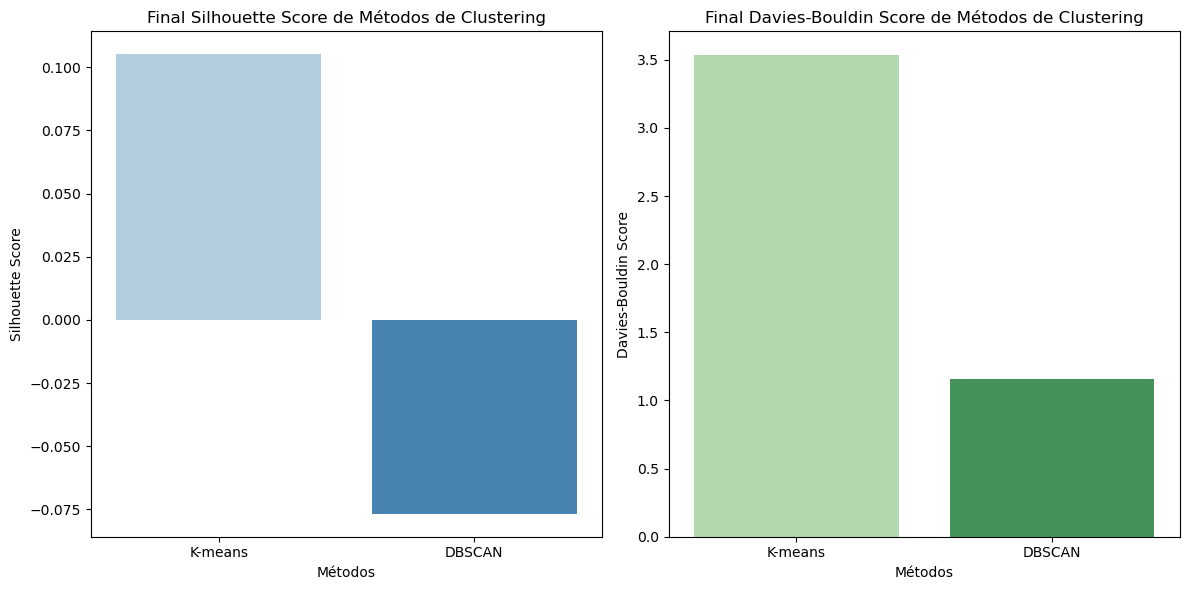

In [29]:
# Visualización de los resultados finales
methods = ['K-means', 'DBSCAN']
silhouette_scores_final = [final_silhouette_kmeans, final_silhouette_dbscan]
davies_bouldin_scores_final = [final_davies_bouldin_kmeans, final_davies_bouldin_dbscan]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=methods, y=silhouette_scores_final, palette='Blues')
plt.title('Final Silhouette Score de Métodos de Clustering')
plt.xlabel('Métodos')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
sns.barplot(x=methods, y=davies_bouldin_scores_final, palette='Greens')
plt.title('Final Davies-Bouldin Score de Métodos de Clustering')
plt.xlabel('Métodos')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()